## This script is used for clustering

In [3]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from funcs.read_data import variables_prep, file_settings
from scipy.spatial.distance import cdist

In [22]:
# import samples selected
fn = f'{file_settings()[0]}adaptive/rmse_iter1/samples_selected.txt'
data = np.loadtxt(fn)
samples = data[0:13, :]
values = data[-1, :].reshape(samples.shape[1], 1)
values = values / values.max()

In [6]:
K=range(5,10)
meandistortions=[]
for k in K:
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(samples)
    meandistortions.append(sum(np.min(
            cdist(samples,kmeans.cluster_centers_,
                 'euclidean'),axis=1))/samples.shape[1])
# plt.plot(K,meandistortions,'bx-')
# plt.xlabel('k')
# plt.ylabel(u'平均畸变程度',fontproperties=font)
# plt.title(u'用肘部法则来确定最佳的K值',fontproperties=font)

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rc
rc("text", usetex=False)

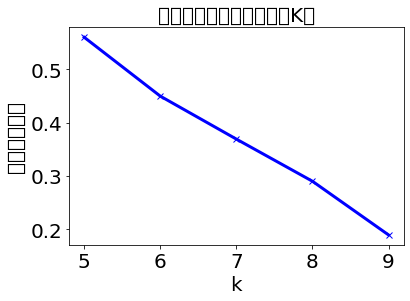

In [13]:
plt.plot(K,meandistortions,'bx-')
plt.xlabel('k');
plt.ylabel(u'average distance');
plt.title(u'The best K measured with the elbow point');

In [33]:
x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)

In [35]:
X.shape

(14, 2)

C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 24275 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 31995 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 25968 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 36718 missing from current font.
  font.set_text(s, 0, flags=flags)
C:\Users\qianw\anaconda3\envs\oed\lib\site-packages\matplotlib\backends\backend_ag

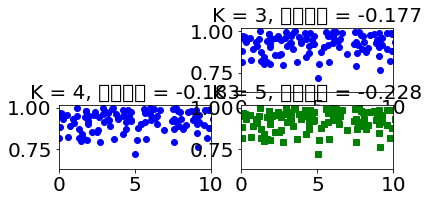

In [44]:
from sklearn import metrics
colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
K = [3, 4, 5]
subplot_counter=1
for t in K:
    subplot_counter+=1
    plt.subplot(3,2,subplot_counter)
    kmeans_model=KMeans(n_clusters=t).fit(samples.T)
#     print kmeans_model.labels_:每个点对应的标签值
    for i,l in enumerate(kmeans_model.labels_):
        plt.plot(samples[0, i], values[i], color=colors[l],
             marker=markers[l],ls='None')
        plt.xlim([0,10])
#         plt.ylim([0,10])
        plt.title(u'K = %s, 轮廓系数 = %.03f' % 
                  (t, metrics.silhouette_score
                   (values, kmeans_model.labels_,metric='euclidean'))
                  )